In [108]:
import os
import numpy as np

In [109]:
File_data = np.loadtxt(r'C:\Users\Zamani\cipher_text.txt', dtype=str)
#print(File_data)
np.shape(File_data)

#File_data[:,0]
pt = File_data[:,0]
ct = File_data[:,1]

In [110]:
#pt

In [111]:
result_data = np.loadtxt(r'C:\Users\Zamani\result.txt', dtype=str)
print(result_data)
np.shape(result_data)
y=np.reshape(result_data,[1000,16])
np.shape(y)
#y

['CE58D62DC430CD2E' 'C430CD2E9CE468CD' '9CE468CD31DB78AB' ...
 '4D54996A174E7A23' '174E7A2380EFFAEC' '80EFFAECCBC48EF7']


(1000, 16)

In [112]:
R0 = y[:,0]
R1 = y[:,1]
R2 = y[:,2]
R3 = y[:,3]
R4 = y[:,4]
R5 = y[:,5]
R6 = y[:,6]
R7 = y[:,7]
R8 = y[:,8]
R9 = y[:,9]
R10 = y[:,10]
R11 = y[:,11]
R12 = y[:,12]
R13 = y[:,13]
R14 = y[:,14]
R15 = y[:,15]

In [113]:
#R0,R1

In [115]:
T = np.stack((pt,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R12,R13,R14,R15,ct),axis=1)
#T

In [116]:
T[0][1]

'CE58D62DC430CD2E'

In [117]:
my_list = [T[0][1][idx:idx + n] for idx in range(0,15,n)]
my_list


['CE', '58', 'D6', '2D', 'C4', '30', 'CD', '2E']

In [118]:
my_List = np.empty((1000,17,8),dtype=int)
for i in range(0,1000):
    for j in range(0,17):
        x = 0
        for idx in range(0,15,n):
            my_List[i,j,x] = int(T[i][j][idx:idx+n],16)
            x = x+1
    

In [119]:
my_List.shape

(1000, 17, 8)

In [120]:
my_List = my_List.reshape((1000,17*8))

In [121]:
my_List.shape

(1000, 136)

In [122]:
 HW = np.array([0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4, 1, 2, 2, 3,
                   2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 1, 2, 2, 3, 2, 3, 3, 4,
                   2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5,
                   4, 5, 5, 6, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5,
                   2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 2, 3, 3, 4,
                   3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5, 4, 5, 5, 6,
                   4, 5, 5, 6, 5, 6, 6, 7, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4,
                   3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6,
                   2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5,
                   4, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 7, 2, 3, 3, 4, 3, 4, 4, 5,
                   3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 5, 6,
                   5, 6, 6, 7, 3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 7,
                   4, 5, 5, 6, 5, 6, 6, 7, 5, 6, 6, 7, 6, 7, 7, 8],
                  dtype=np.uint8)

In [123]:
import matplotlib.pyplot as plt


In [124]:
plt.plot(my_List[2,:])

In [125]:
my_List

array([[ 23, 152, 143, ..., 243, 164, 204],
       [ 94, 141,  62, ..., 154, 180,  42],
       [189, 220, 217, ..., 109,   4,  41],
       ...,
       [130, 131, 186, ...,   5,  45, 234],
       [ 51, 161,  36, ...,   4, 248, 225],
       [206, 179, 255, ...,  23, 183, 255]])

In [126]:
HW[my_List[1,8]]

4

In [127]:
IdealPowerM = np.empty((my_List.shape[0],my_List.shape[1]),dtype="uint8")
for i in range(0,my_List.shape[0]):
    for i in range(0,my_List.shape[1]):
        IdealPowerM[i,j] = HW[my_List[i,j]]

In [128]:
IdealPowerM

array([[ 16,  16,  60, ...,  39,  44,  92],
       [110,  32,  32, ...,  65,  39,  44],
       [ 92, 110,  32, ...,  39,  48,  39],
       ...,
       [112,  30,  14, ...,   2,   0,   0],
       [112, 170,  10, ...,   2,   0,   0],
       [112,  36,  14, ...,   2,   0,   0]], dtype=uint8)

In [129]:
plt.plot(IdealPowerM[1,:])

In [134]:
noise = np.random.normal(0,56,IdealPowerM.shape)

In [135]:
NoisyPower = IdealPowerM + noise

<IPython.core.display.Javascript object>


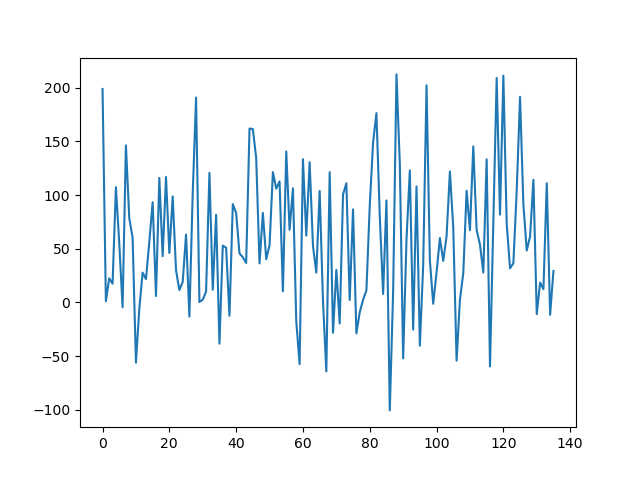

In [136]:
%matplotlib notebook
plt.plot(NoisyPower[1,:])

<IPython.core.display.Javascript object>


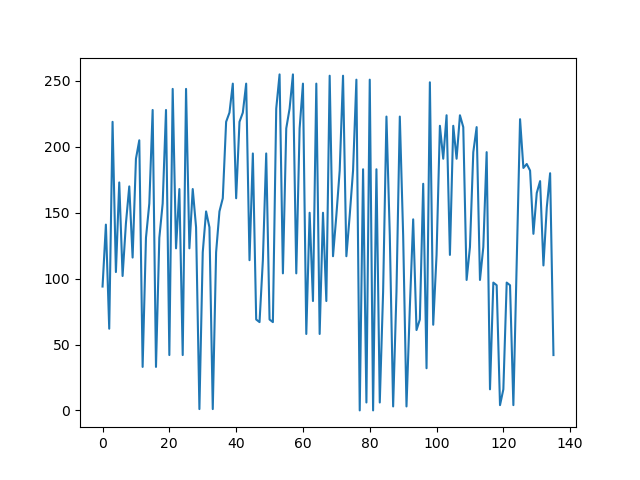

In [137]:
%matplotlib notebook
plt.plot(my_List[1,:])